# CSCN8000 –Artificial Intelligence Algorithms and Mathematics
<br>
Name       : Khushbu Nileshkumar Lad<br>
Student No : 9027375

##### Import libraries

In [60]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns
from scipy.stats import skew
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import roc_curve, auc


## Midterm Part B: Logistic Regression

##### Load the dataset and review

In [2]:
CreditCard_Dataset = pd.read_csv("./Dataset/creditcard.csv")
CreditCard_Dataset.head(5)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


### Data Preprocessing Tasks

##### Explore Data : Box Plot for all numerical features to review distribution and indentify outliers

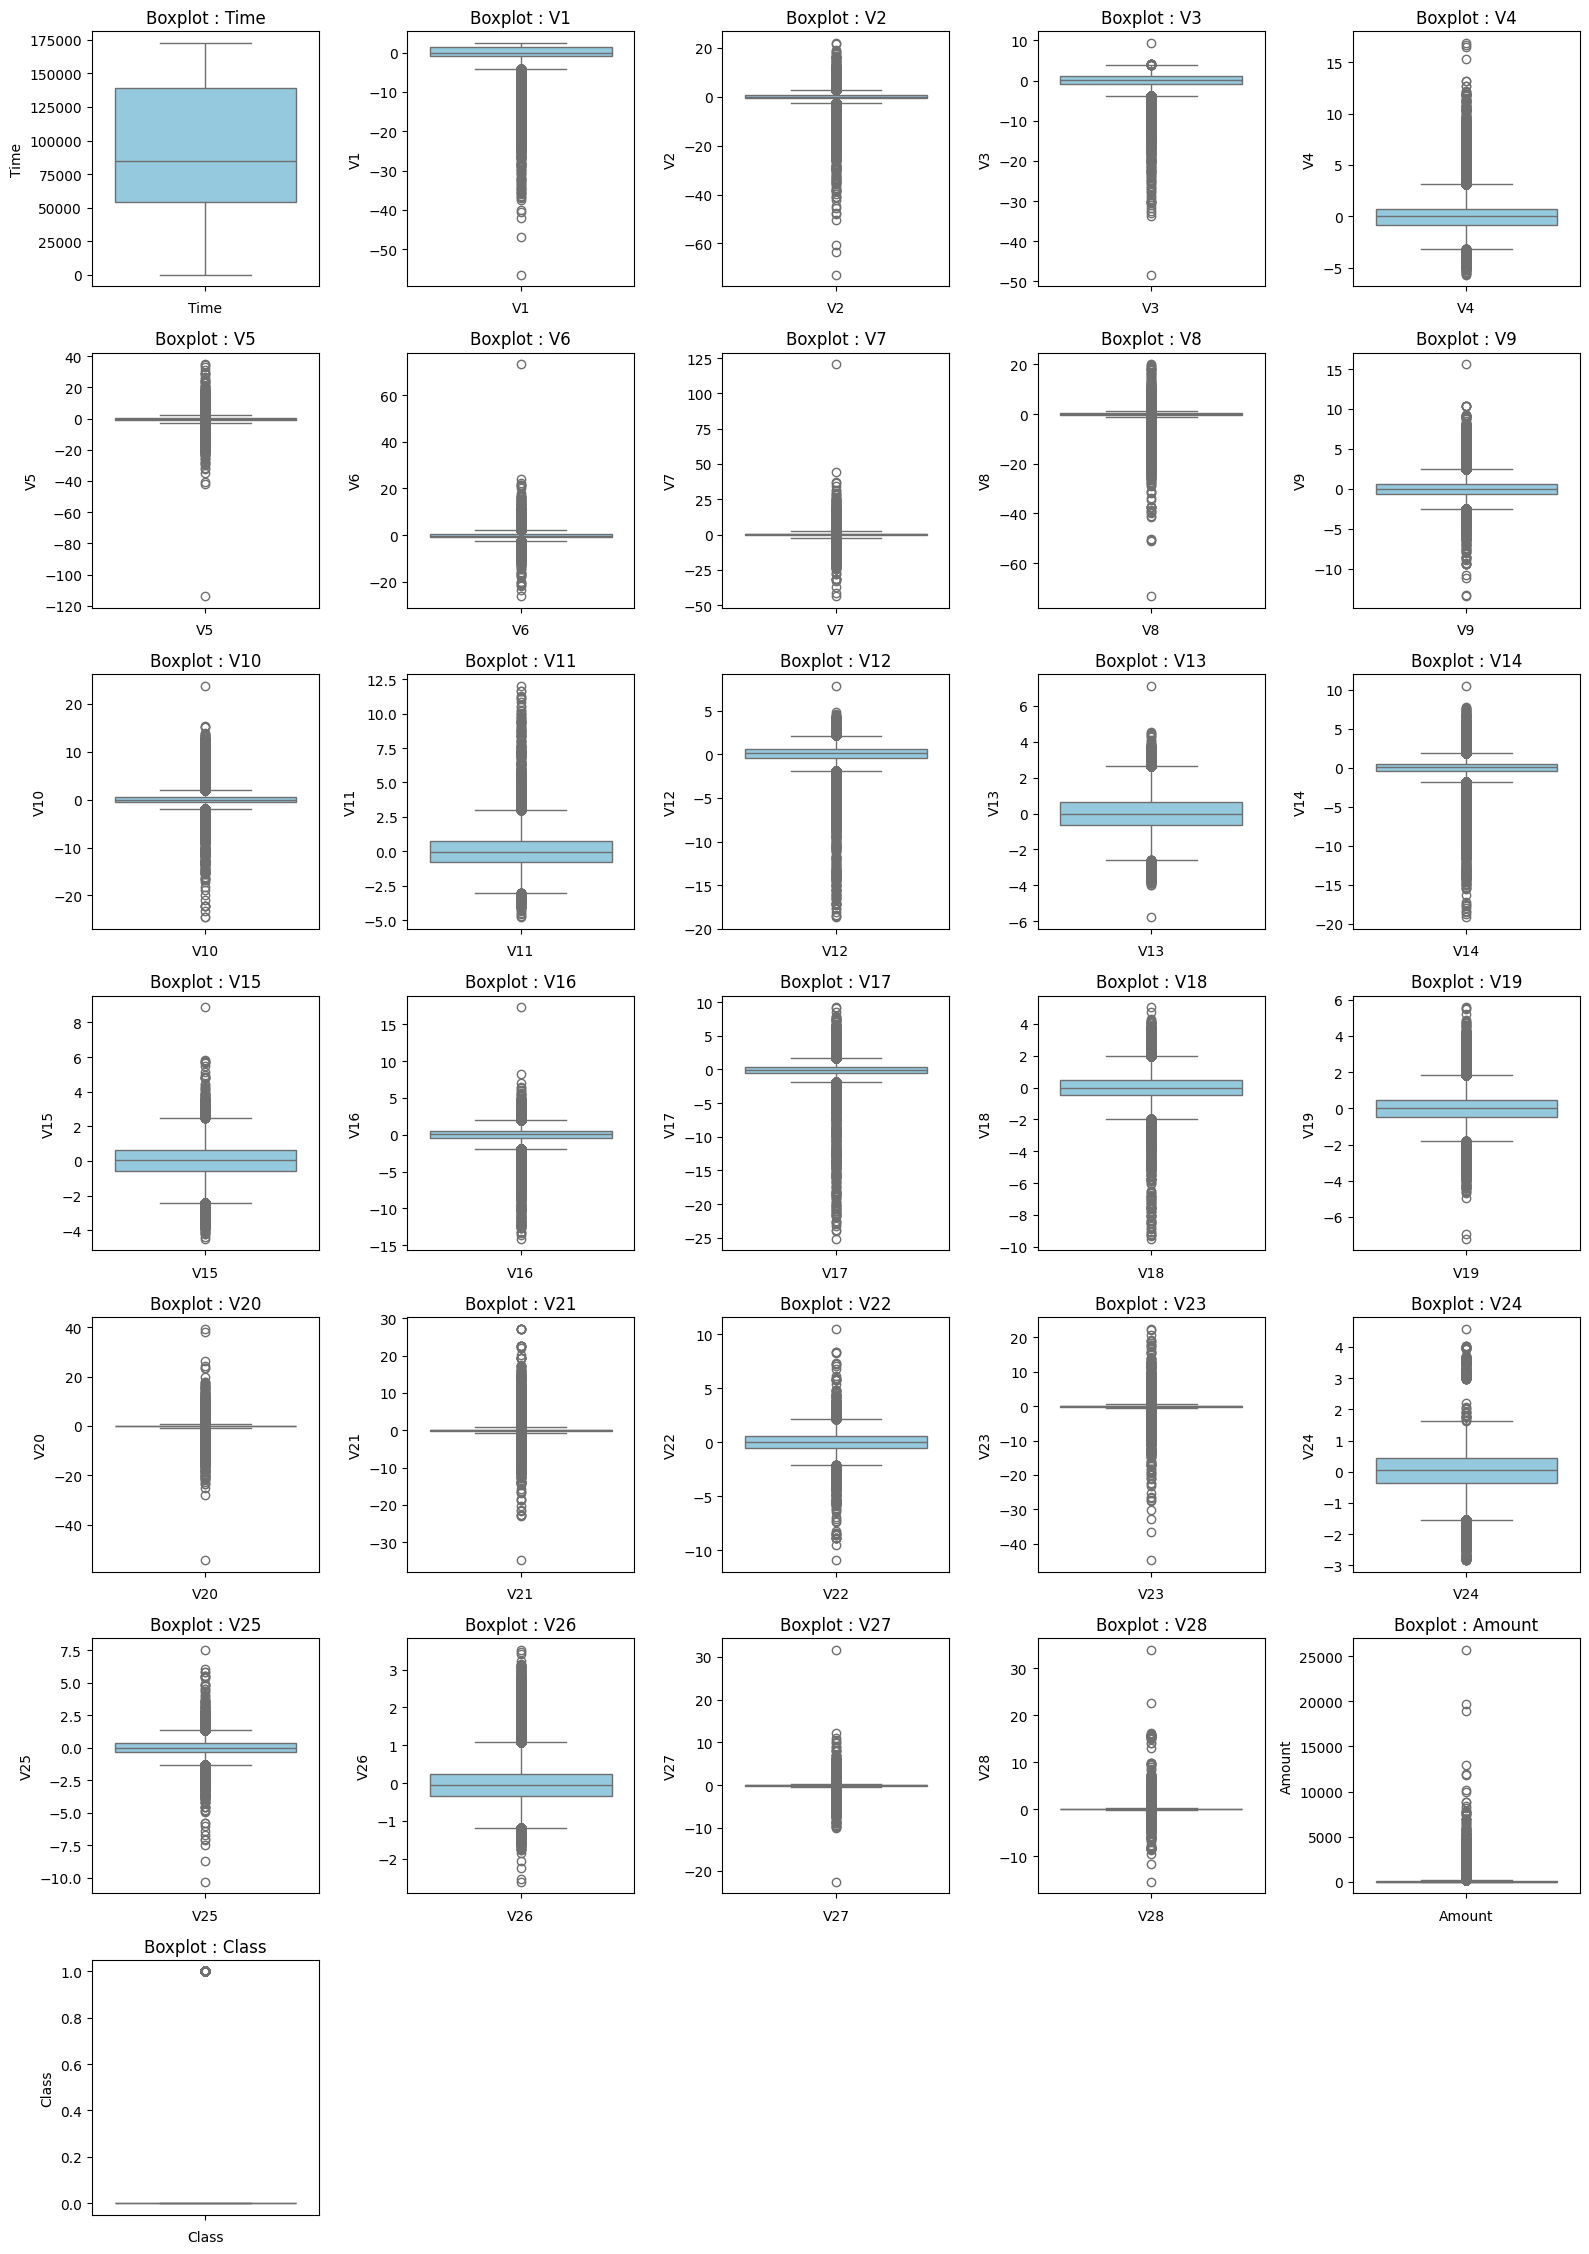

In [3]:
fig, axes = plt.subplots(nrows=10, ncols=5, figsize=(16, 32))
axes = axes.flatten()

# Get only numeric columns
numeric_columns = CreditCard_Dataset.select_dtypes(include=['number']).columns

# Plot both boxplot and density plot for each numeric column
for i, column in enumerate(numeric_columns):
    # Plot boxplot 
    sns.boxplot(y=CreditCard_Dataset[column], ax=axes[i], color='skyblue')
    axes[i].set_title(f'Boxplot : {column}')
    axes[i].set_xlabel(column)

# Hide unused axes
for i in range(len(numeric_columns), len(axes)):
    axes[i].set_visible(False)

plt.tight_layout()
plt.show()

-   Box plots illustrates that there are significant outliers in numerical columns expect time.
-   Because **number of outliers** are higher for each columns, **Whisker's Approach** is most appropriate method for removing outliers

##### Remove Ourliers using Whisker's Approach

In [4]:
CreditCard_Dataset_clean = CreditCard_Dataset
for column in CreditCard_Dataset_clean.columns:
    # Ignore class column
    if(column == "Class"):
        continue
    # Calculate Q1 (25th percentile) and Q3 (75th percentile)
    Q1 = CreditCard_Dataset[column].quantile(0.25)
    Q3 = CreditCard_Dataset[column].quantile(0.75)
    # Calculate IQR
    IQR = Q3 - Q1
    # Define the bounds
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
 
    # Filter out the outliers
    # CreditCard_Dataset_clean = CreditCard_Dataset[(CreditCard_Dataset[column] >= lower_bound) & (CreditCard_Dataset[column] <= upper_bound)]
    # Replace outlier with mean 
    mean_value = CreditCard_Dataset[column].mean()
    CreditCard_Dataset_clean.loc[(CreditCard_Dataset_clean[column] < lower_bound) | (CreditCard_Dataset_clean[column] > upper_bound), column] = mean_value
print("Original dataset shape:", CreditCard_Dataset.shape)
print("Dataset shape after outlier removal:", CreditCard_Dataset_clean.shape)

Original dataset shape: (284807, 31)
Dataset shape after outlier removal: (284807, 31)


##### Review clean data

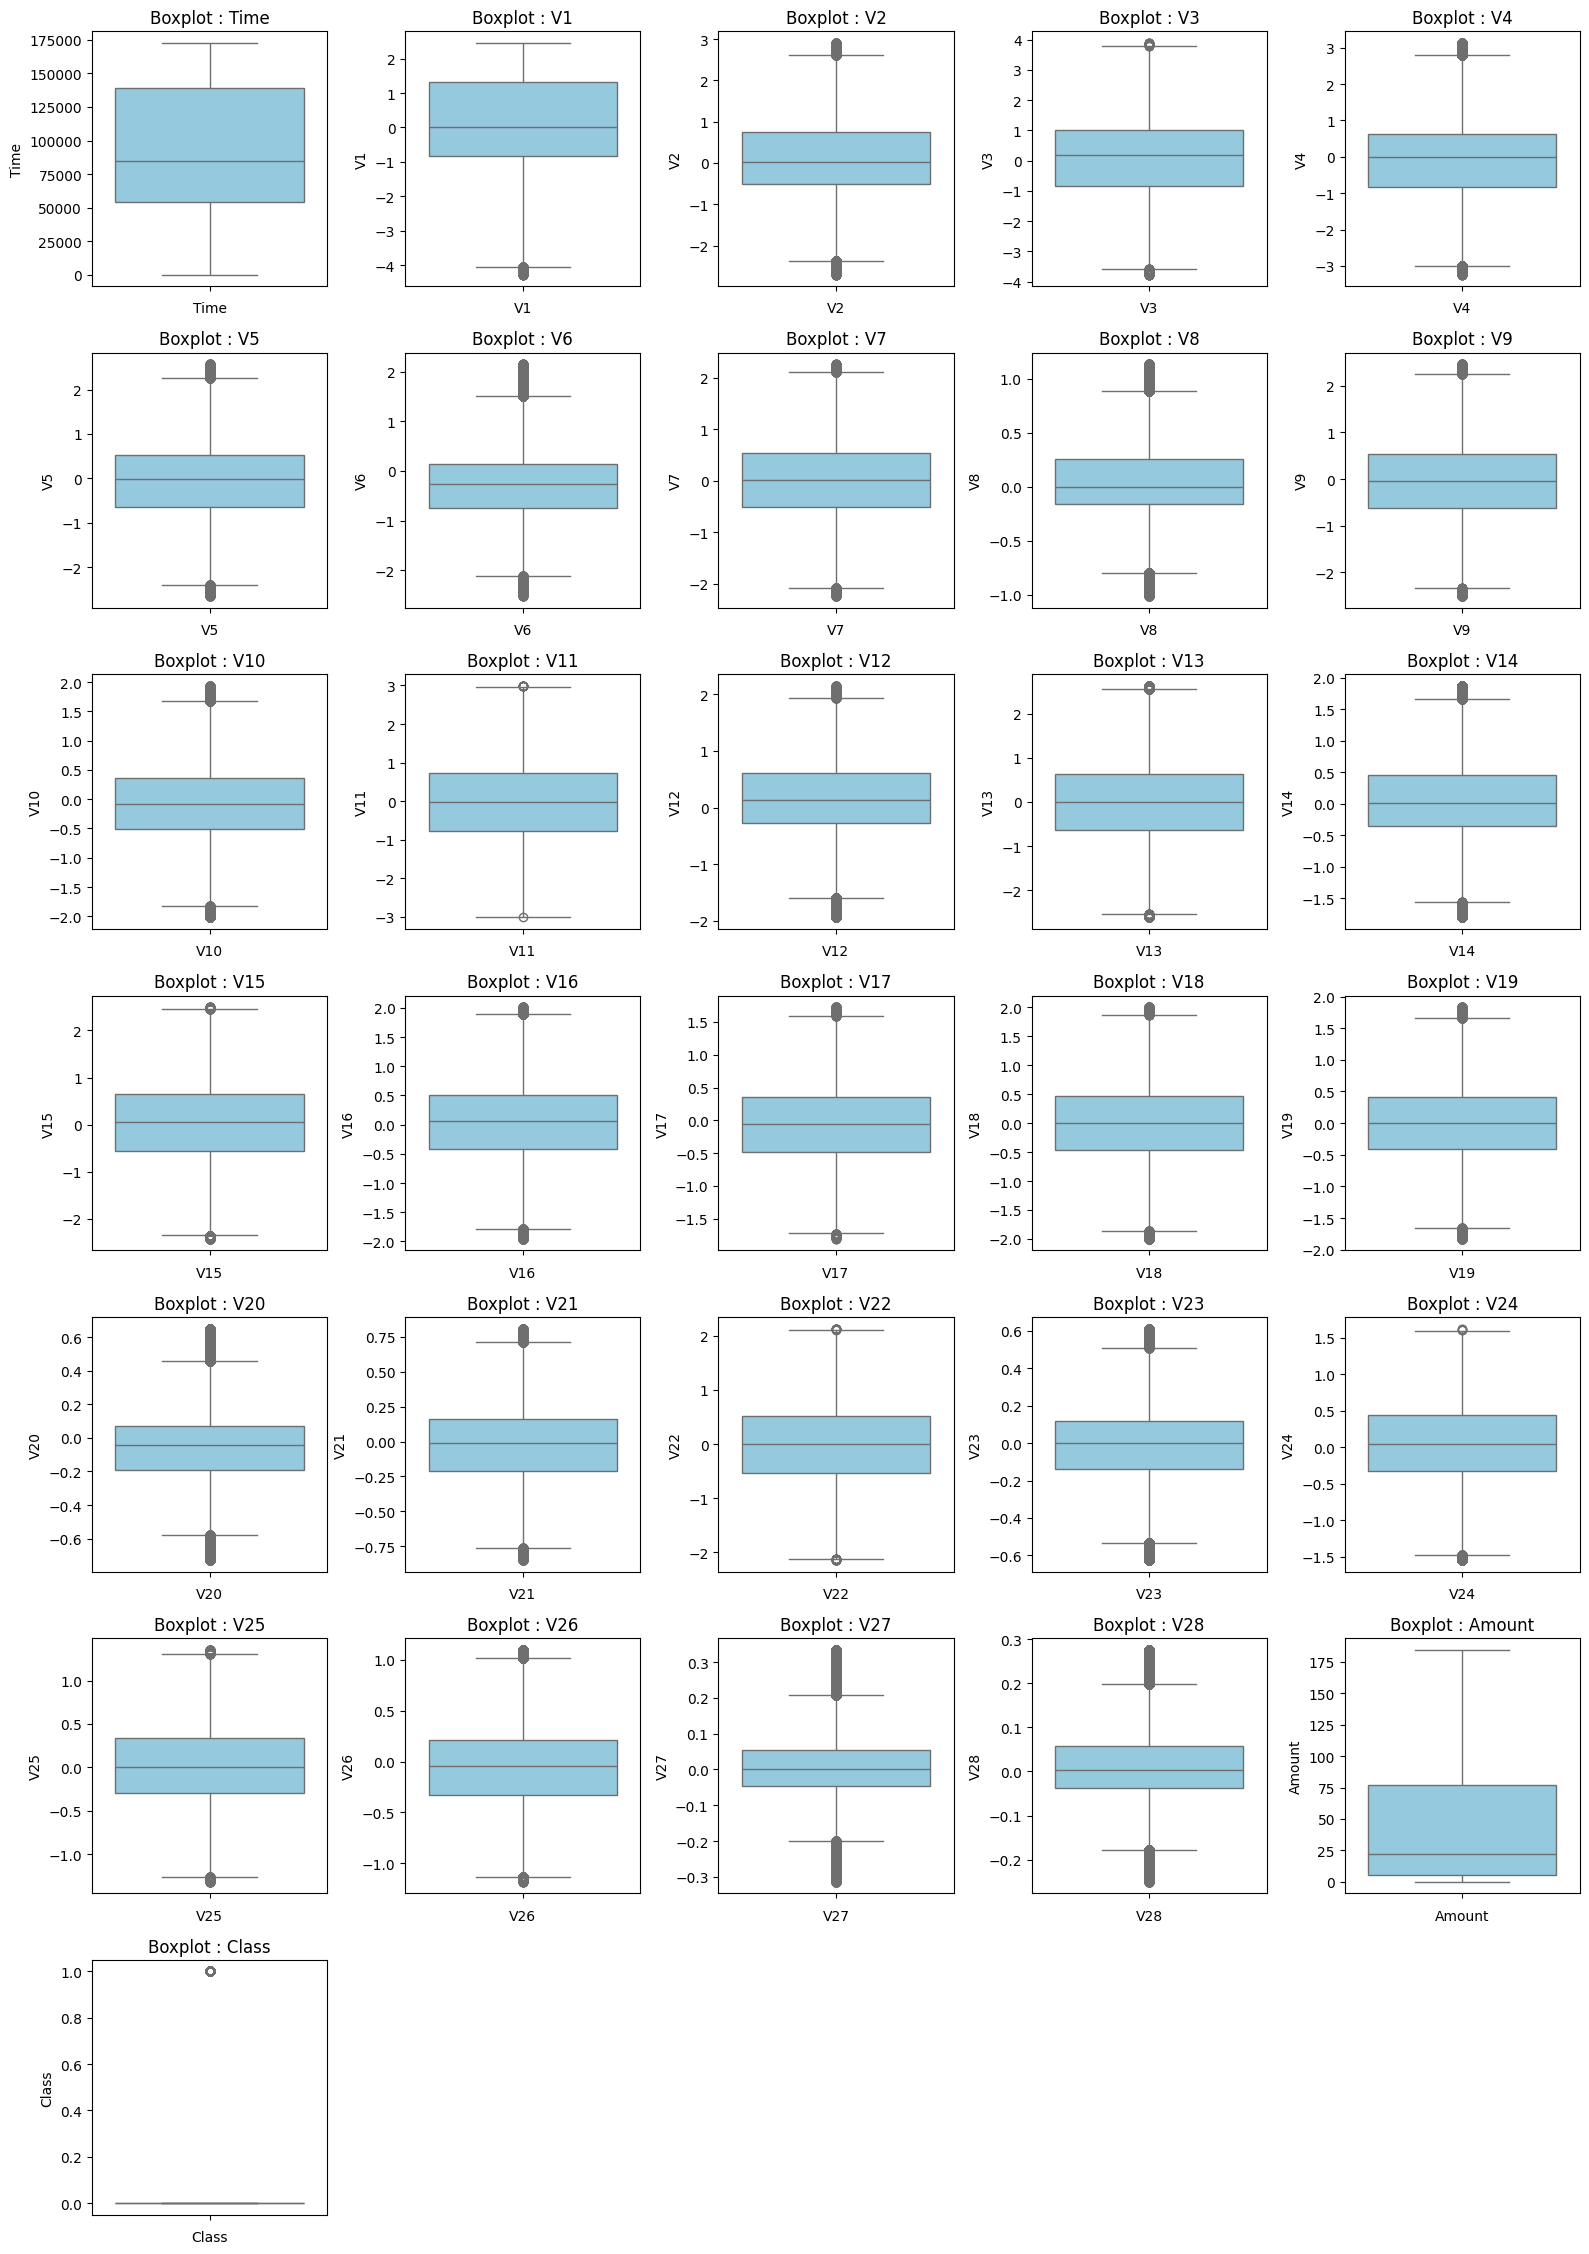

In [5]:
fig, axes = plt.subplots(nrows=10, ncols=5, figsize=(16, 32))
axes = axes.flatten()

# Get only numeric columns
numeric_columns = CreditCard_Dataset_clean.select_dtypes(include=['number']).columns

# Plot both boxplot and density plot for each numeric column
for i, column in enumerate(numeric_columns):
    # Plot boxplot 
    sns.boxplot(y=CreditCard_Dataset_clean[column], ax=axes[i], color='skyblue')
    axes[i].set_title(f'Boxplot : {column}')
    axes[i].set_xlabel(column)

# Hide unused axes
for i in range(len(numeric_columns), len(axes)):
    axes[i].set_visible(False)

plt.tight_layout()
plt.show()

-    Box plots for dataset after outliers are removed indicates that most of the extreme outliers has been removed as most of the box plot has standard shape

##### Analyze Distribution

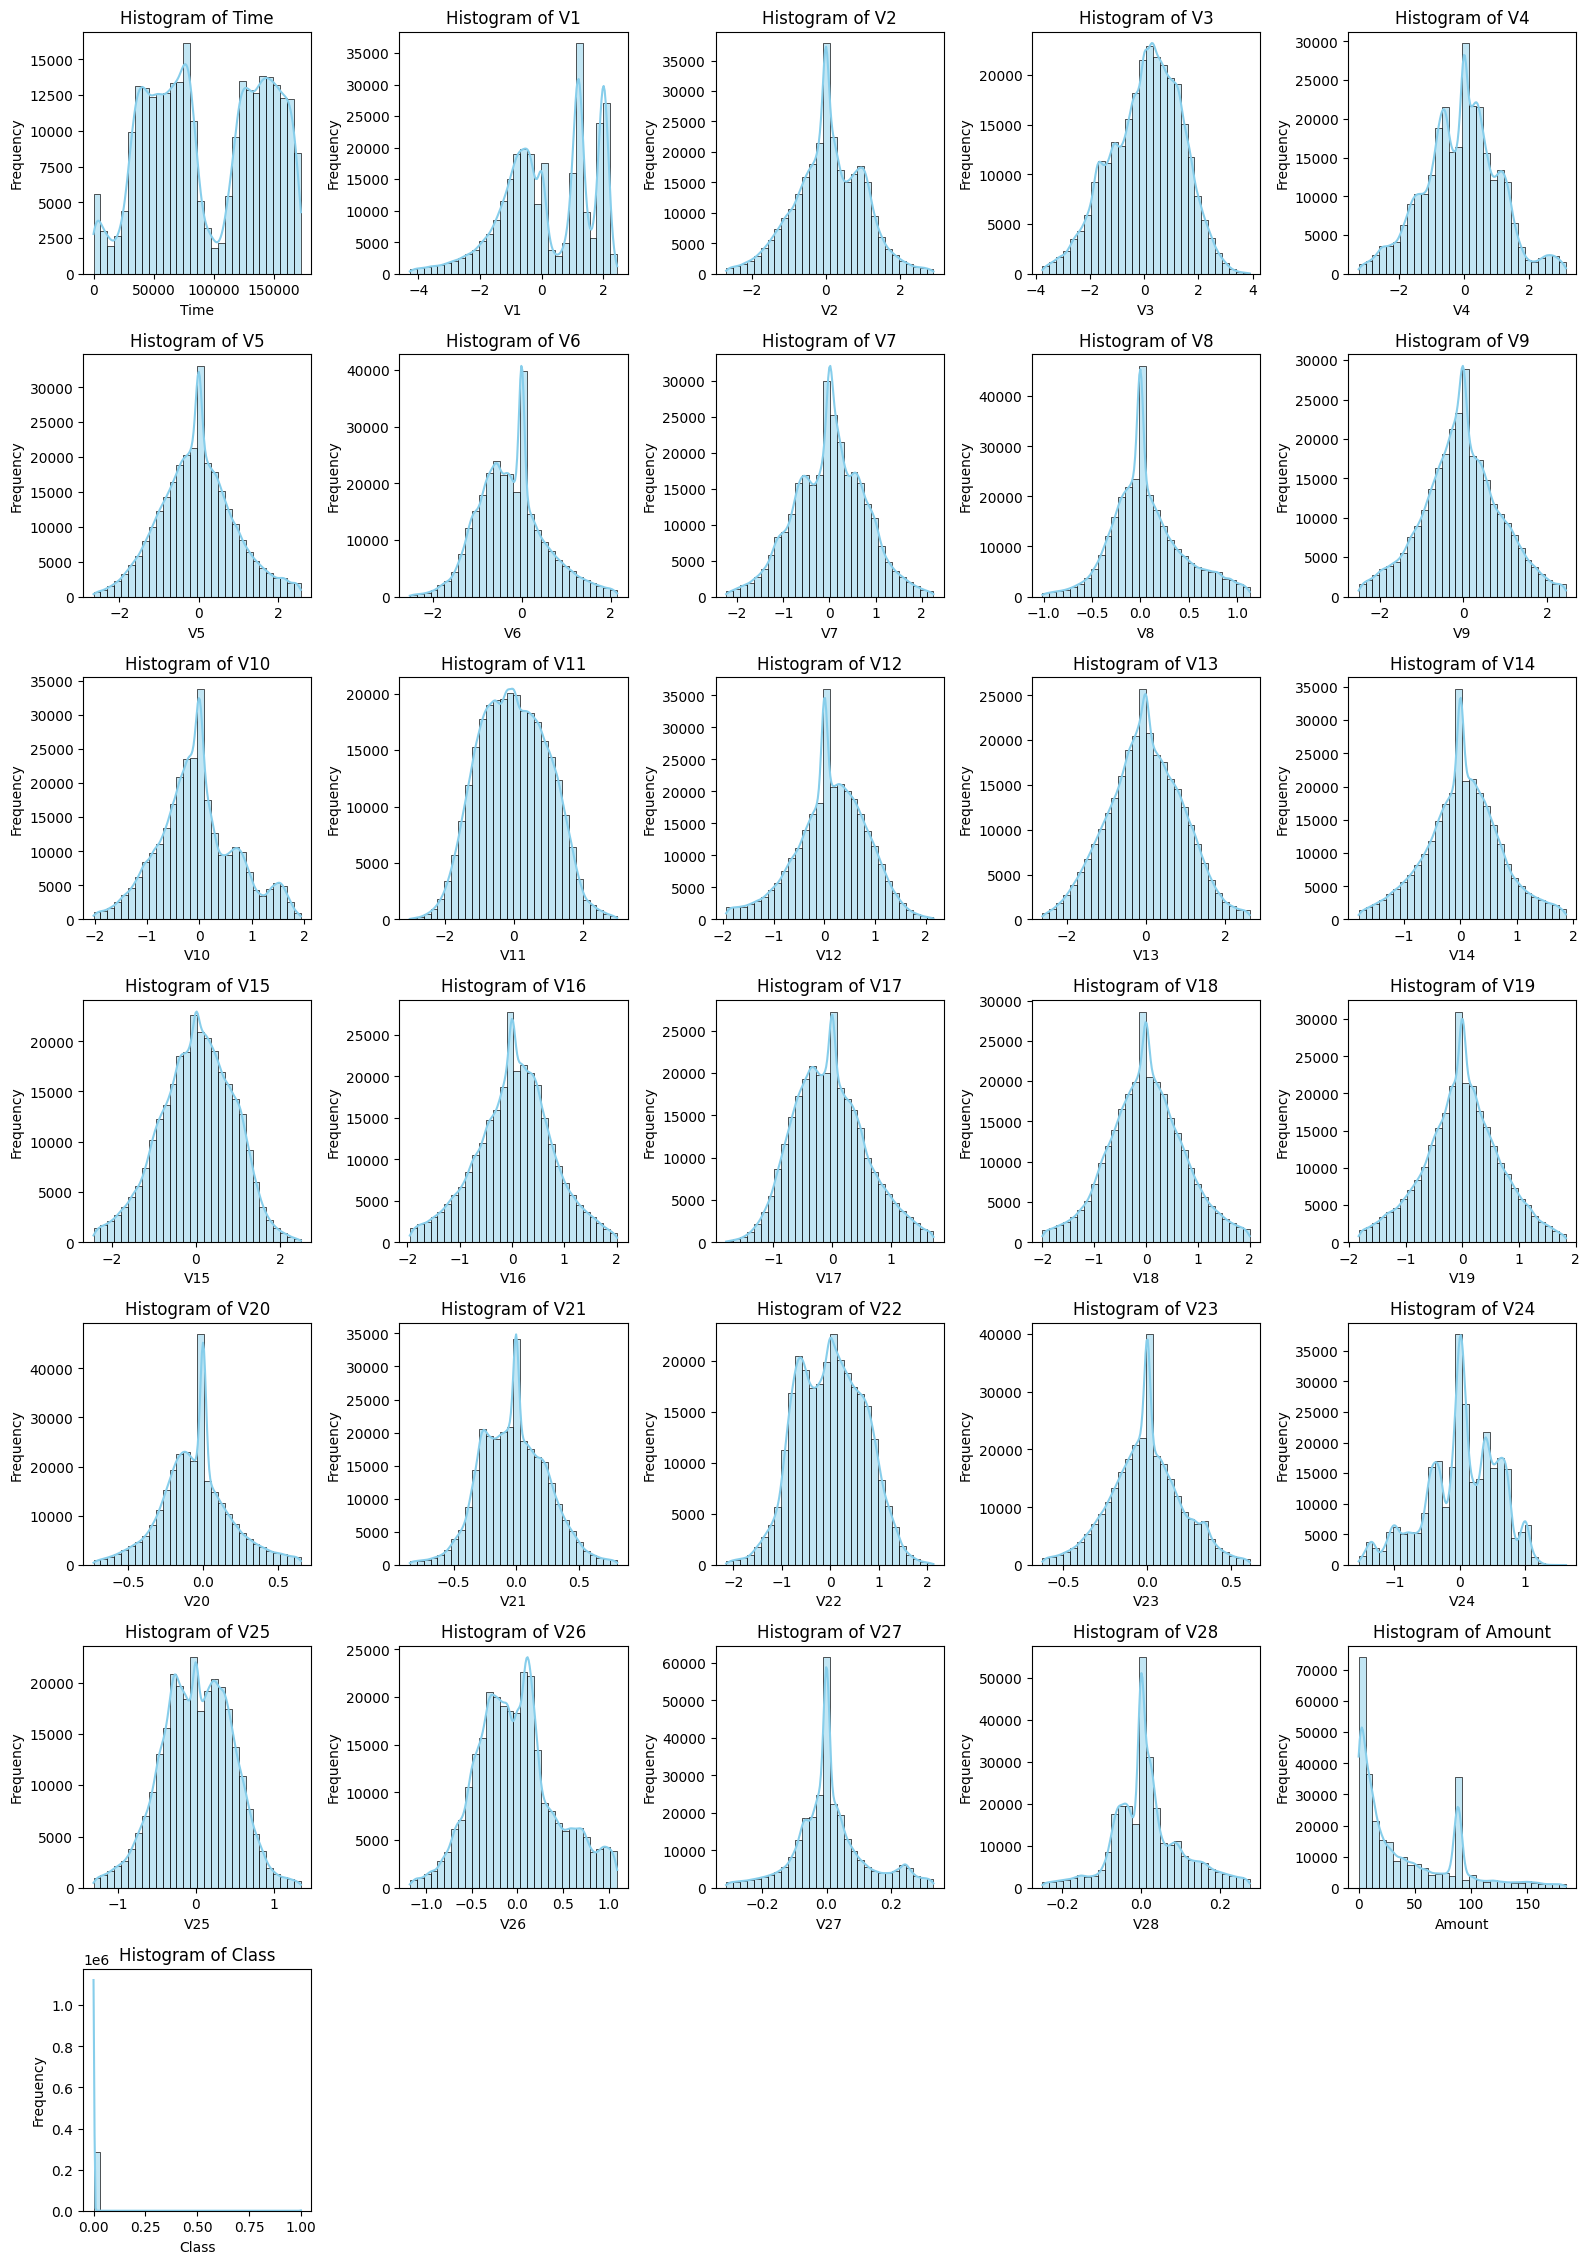

In [6]:
fig, axes = plt.subplots(nrows=10, ncols=5, figsize=(16, 32))
axes = axes.flatten()

# Get only numeric columns
numeric_columns = CreditCard_Dataset_clean.select_dtypes(include=['number']).columns

# Plot histogram for each numeric column
for i, column in enumerate(numeric_columns):
    # Plot hostogram 
    sns.histplot(CreditCard_Dataset_clean[column], ax=axes[i], kde=True, color='skyblue', bins=30)
    axes[i].set_title(f'Histogram of {column}')
    axes[i].set_xlabel(column)
    axes[i].set_ylabel('Frequency')

# Hide unused axes
for i in range(len(numeric_columns), len(axes)):
    axes[i].set_visible(False)

plt.tight_layout()
plt.show()

##### Normalise Data as per skew

In [7]:
# Initialize scalers
minmax_scaler = MinMaxScaler()
standard_scaler = StandardScaler()

# Normalize based on skewness
for column in CreditCard_Dataset_clean.columns:
    # Ignore class column
    if(column == "Class"):
        continue
    col_skewness = skew(CreditCard_Dataset_clean[column])
    if abs(col_skewness) > 1:  # Highly skewed
        # Apply Min-Max Scaling
        CreditCard_Dataset_clean[column] = minmax_scaler.fit_transform(CreditCard_Dataset_clean[[column]])
    else:
        # Apply Z-score Normalization
        CreditCard_Dataset_clean[column] = standard_scaler.fit_transform(CreditCard_Dataset_clean[[column]])

##### Review Distribution after normalization

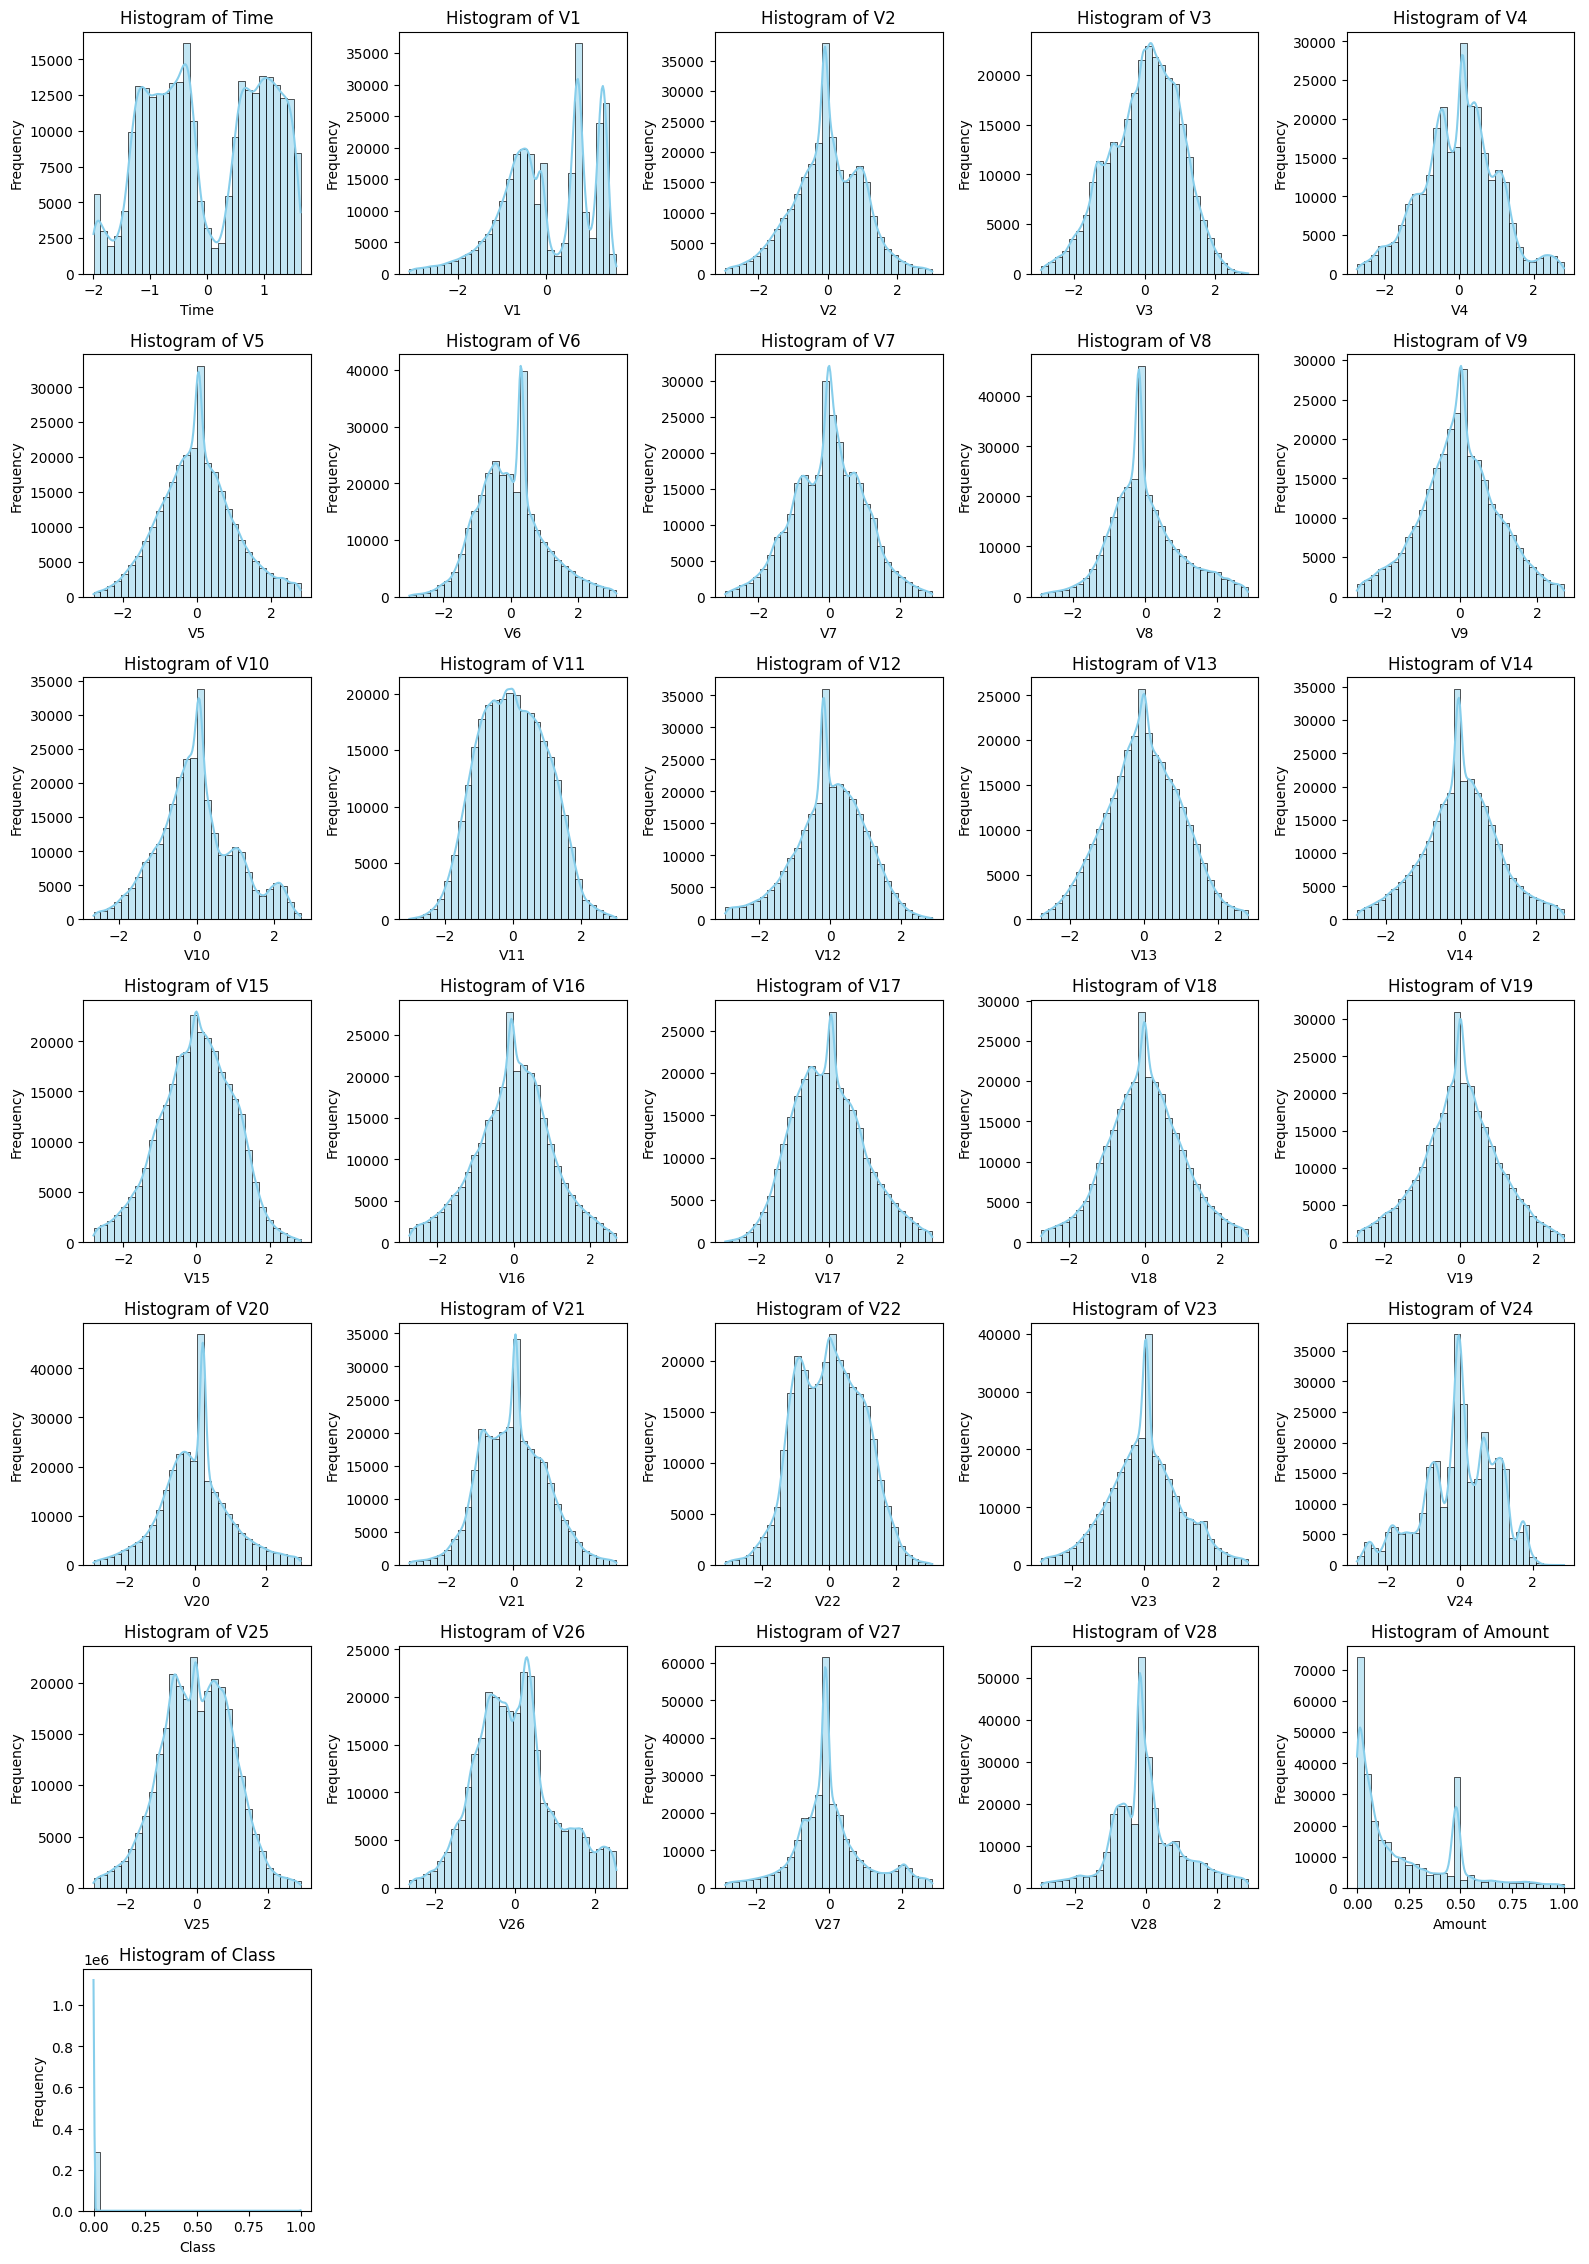

In [8]:
fig, axes = plt.subplots(nrows=10, ncols=5, figsize=(16, 32))
axes = axes.flatten()

# Get only numeric columns
numeric_columns = CreditCard_Dataset_clean.select_dtypes(include=['number']).columns

# Plot both boxplot for each numeric column
for i, column in enumerate(numeric_columns):
    # Plot hostogram 
    sns.histplot(CreditCard_Dataset_clean[column], ax=axes[i], kde=True, color='skyblue', bins=30)
    axes[i].set_title(f'Histogram of {column}')
    axes[i].set_xlabel(column)
    axes[i].set_ylabel('Frequency')

# Hide unused axes
for i in range(len(numeric_columns), len(axes)):
    axes[i].set_visible(False)

plt.tight_layout()
plt.show()

### Descriptive Analytics Tasks

#### The distribution of fraud vs non-fraud transactions

##### Review value count

In [9]:
# Review value count
# 0 = non-fraud
# 1 = fraud
class_counts = CreditCard_Dataset_clean['Class'].value_counts()

# Print  class value counts
print(class_counts)

Class
0    284315
1       492
Name: count, dtype: int64


##### Density plot to review overlapping area

C:\Users\Khushbu.Lad\AppData\Local\Temp\ipykernel_16664\2561031456.py:11: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(data=CreditCard_Dataset_clean, x=column, hue='Class', fill=True, common_norm=False, alpha=0.5, ax=axes[i])


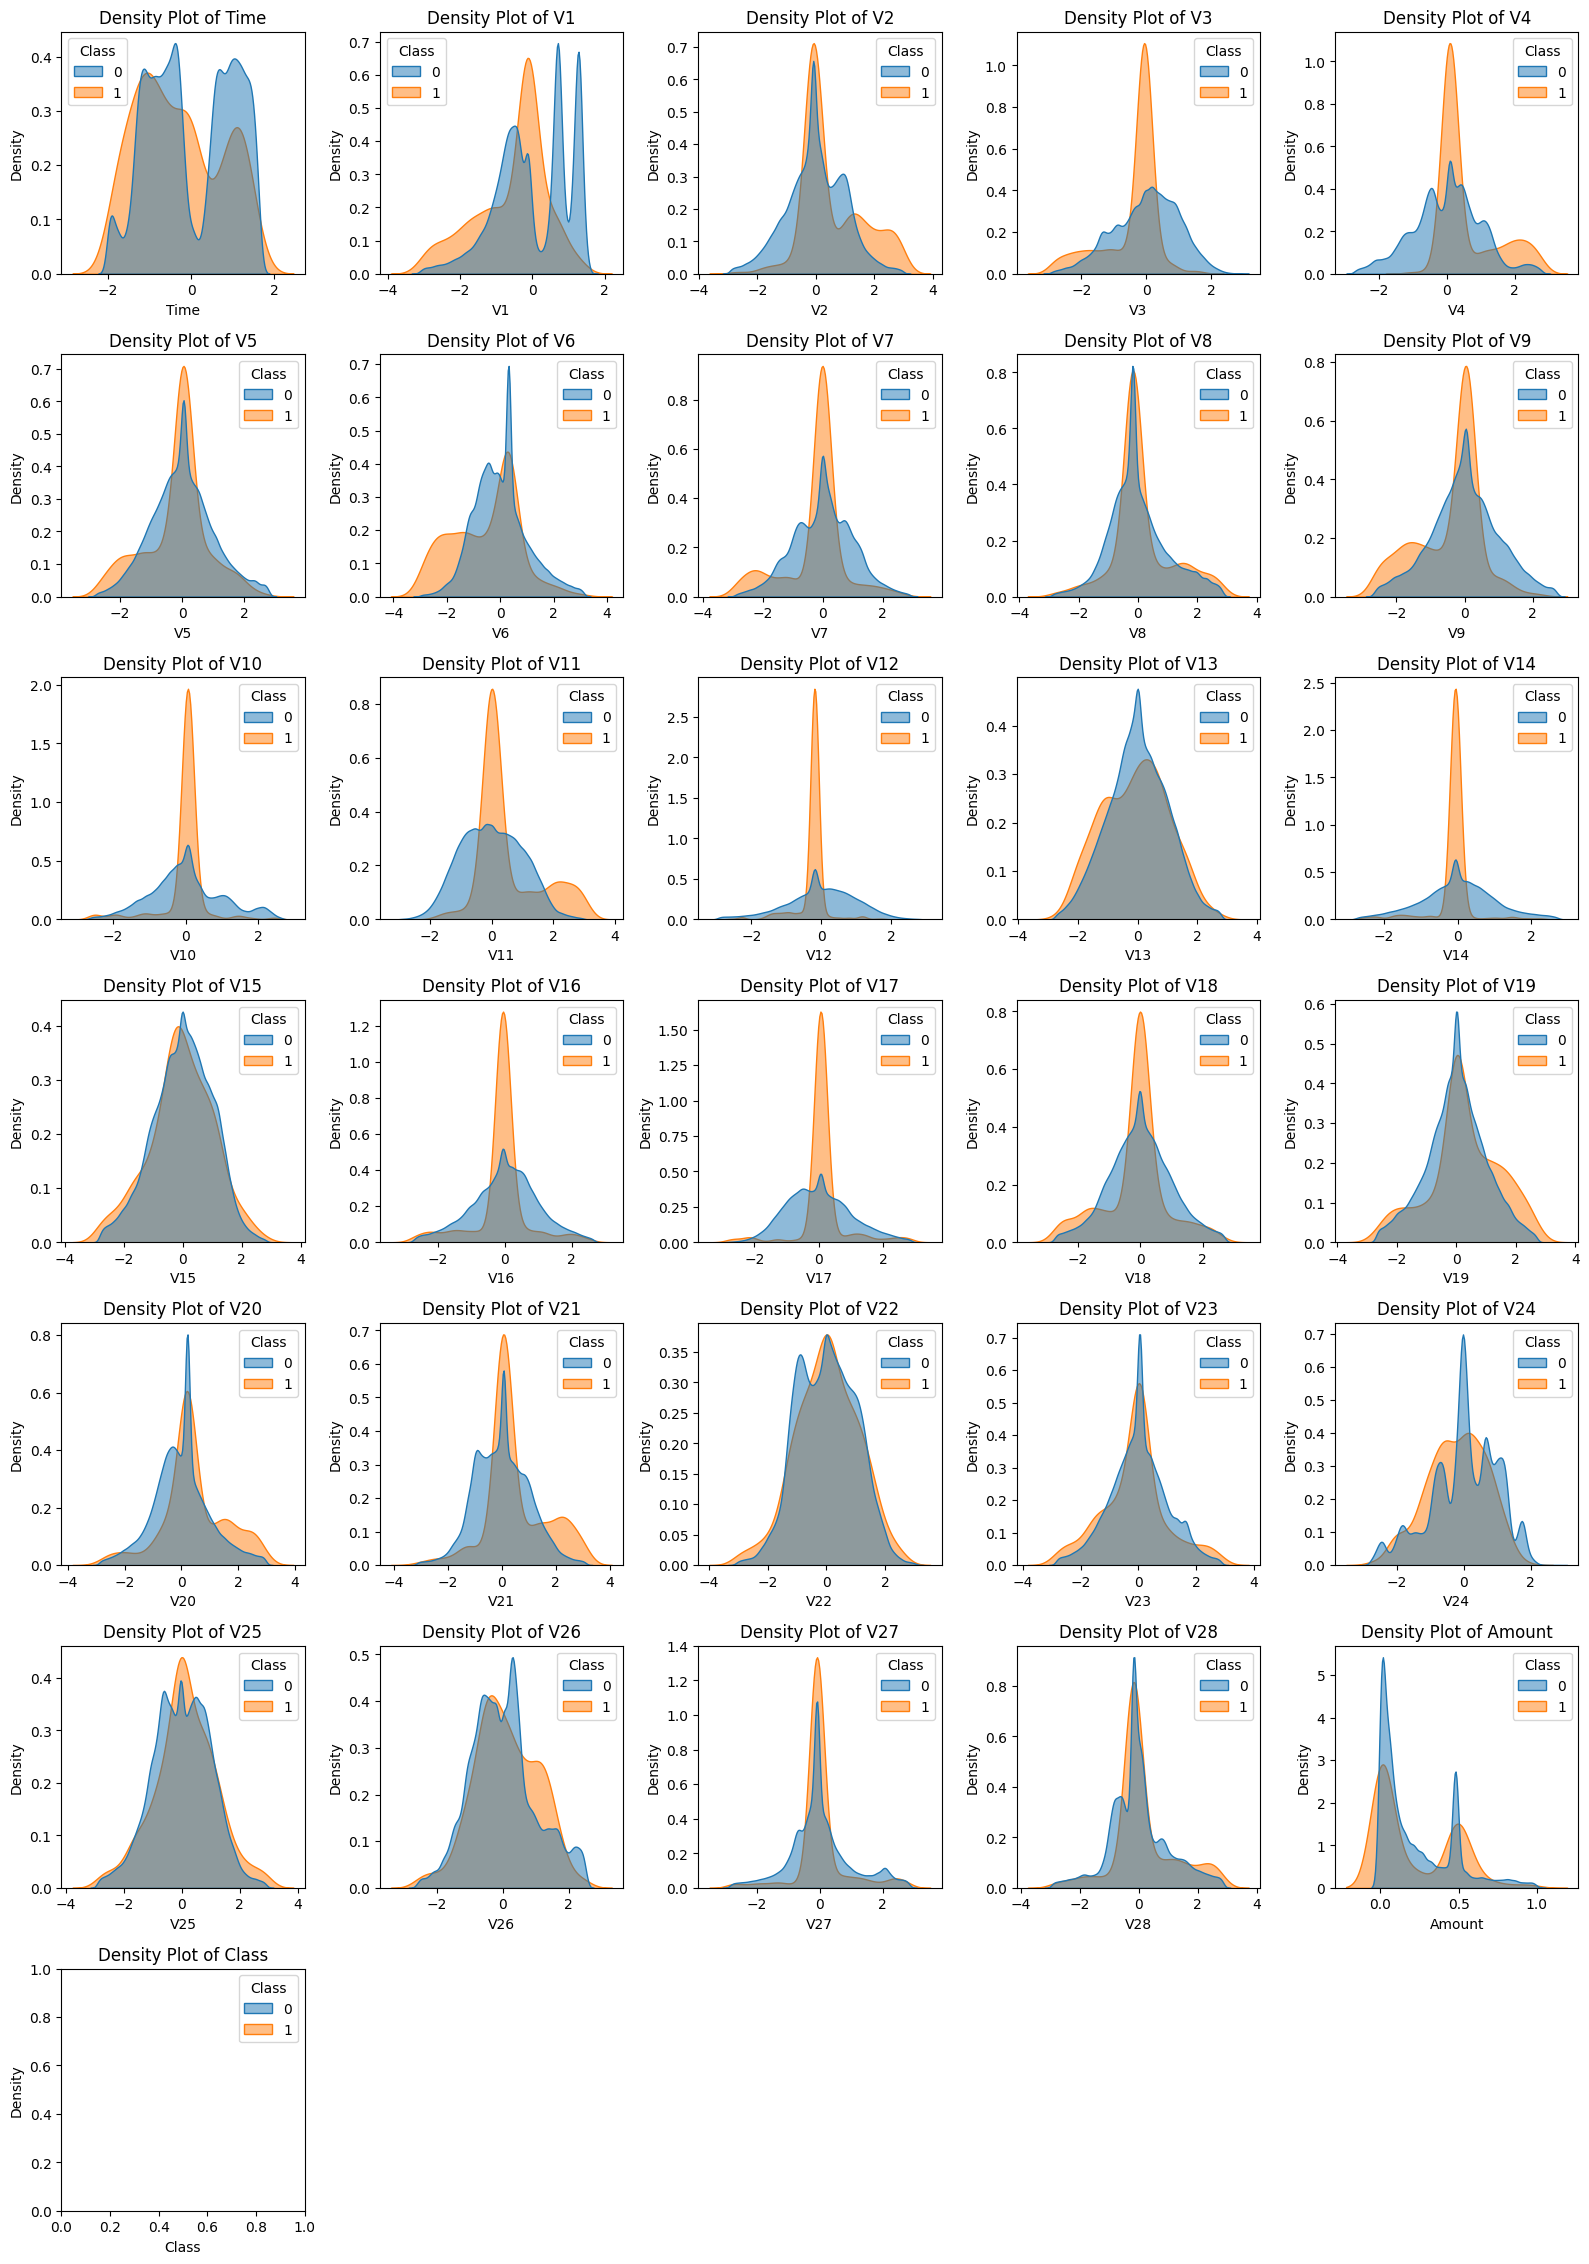

In [10]:
# Create subplots
fig, axes = plt.subplots(nrows=10, ncols=5, figsize=(16, 32))
axes = axes.flatten()

# Get only numeric columns
numeric_columns = CreditCard_Dataset_clean.select_dtypes(include=['number']).columns

# Plot density plot for each numeric column
for i, column in enumerate(numeric_columns):
    # Plot density
    sns.kdeplot(data=CreditCard_Dataset_clean, x=column, hue='Class', fill=True, common_norm=False, alpha=0.5, ax=axes[i])
    axes[i].set_title(f'Density Plot of {column}')
    axes[i].set_xlabel(column)
    axes[i].set_ylabel('Density')

# Hide unused axes
for i in range(len(numeric_columns), len(axes)):
    axes[i].set_visible(False)

plt.tight_layout()
plt.show()

- The distributions attributes : V4, V11, V12, V14, V17, and V18 indicates clear difference between fraud and non-fraud classes . This suggests that these features could be helpful in differentiating between fraudulent and genuine transactions.
- Conversely, v1, v5, v8, v13, v19 and v23 has higher overlapping area, indicates these features are not helpful to identify transactions. 
- Plotting of the **Amount** feature distribution also shows an obvious distinction between fraudulent and non-fraudulent transactions, suggesting that the transaction amount may be important for detecting fraud.


##### Corelation between Class and other numerical features

In [28]:
CreditCard_Dataset_clean['Class'] = CreditCard_Dataset_clean['Class'].astype(int)
# Calculate the correlation matrix
ccorrelation_with_class = CreditCard_Dataset_clean.corr()['Class'].sort_values(ascending=False)

print(ccorrelation_with_class)

Class     1.000000
V4        0.024471
V2        0.023431
V11       0.022837
V21       0.021066
V20       0.017936
V19       0.011031
V28       0.006058
V8        0.005329
V17       0.004942
V25       0.004776
V26       0.004064
V27       0.001076
V22       0.000906
Amount   -0.000161
V10      -0.000953
V15      -0.001967
V13      -0.003777
V16      -0.004887
V14      -0.005152
V23      -0.005640
V18      -0.006018
V5       -0.007402
V24      -0.008953
V7       -0.010452
V12      -0.010551
Time     -0.012323
V3       -0.018549
V9       -0.019105
V6       -0.023334
V1       -0.023542
Name: Class, dtype: float64


##### Show Corelation metrix heatmap

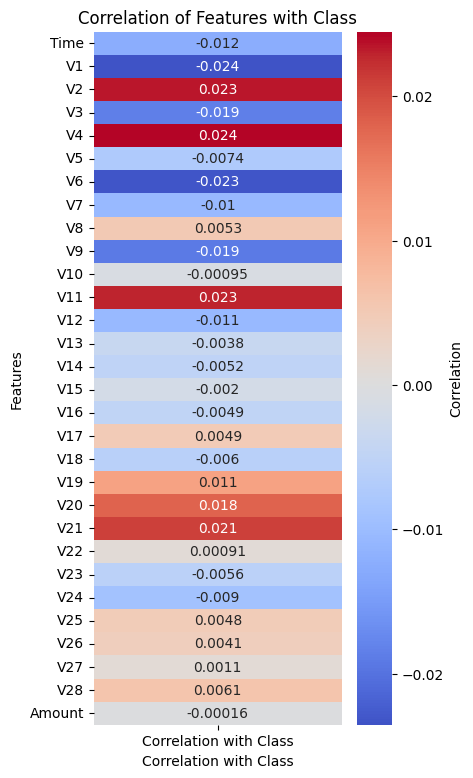

In [27]:
correlation_with_class = CreditCard_Dataset.corr()['Class'].drop('Class')  # Drop 'Class' itself
# Convert the series to a DataFrame for easier plotting
correlation_df = correlation_with_class.to_frame().reset_index()
correlation_df.columns = ['Feature', 'Correlation with Class']

# Plot heatmap
plt.figure(figsize=(4, len(correlation_df) * 0.3))  # Adjust figure size for vertical orientation
sns.heatmap(correlation_df.set_index('Feature'), annot=True, cmap='coolwarm', center=0, cbar_kws={'label': 'Correlation'})
plt.title('Correlation of Features with Class')
plt.ylabel('Features')
plt.xlabel('Correlation with Class')
plt.show()

##### Corelation of fraud vs non-fraud transactions

**As per corelation metrix and heatmap, top 10 properties having positive and negative corelation**

| Feature               | Corelation with fraud     |
|-----------------------|---------------------------|
|v2, v4, v11, v20, v21  | Positive corelation       |
|v1, v3, v6, v9, v24    | Negative corelation       |



### ML Model Training and Testing Tasks

##### Split train and test data 

In [49]:
X = CreditCard_Dataset_clean.drop(columns=["Class"]) 
y = CreditCard_Dataset_clean["Class"] # Target value

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
train_data, test_data = train_test_split(CreditCard_Dataset_clean, test_size=0.2, random_state=42)

print("Training set size:", X_train.shape)
print("Testing set size:", X_test.shape)

Training set size: (227845, 30)
Testing set size: (56962, 30)


##### Apply scaling because KNN and SVM are sensitive to the scale of data

In [50]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

##### 5-fold cross-validation : Logistic regression

In [51]:
logreg = LogisticRegression(max_iter=1000)
logreg_scores = cross_val_score(logreg, X_scaled, y, cv=5)
print(f"Logistic Regression 5-Fold CV Accuracy: {logreg_scores.mean():.4f}")

Logistic Regression 5-Fold CV Accuracy: 0.9983


##### 5-fold cross-validation : K-Nearest Neighbors

In [52]:
knn = KNeighborsClassifier()
knn_scores = cross_val_score(knn, X_scaled, y, cv=5)
print(f"KNN 5-Fold CV Accuracy: {knn_scores.mean():.4f}")

KNN 5-Fold CV Accuracy: 0.9984


##### 5-fold cross-validation : Support Vector Machines

In [41]:
svm = SVC()
svm_scores = cross_val_score(svm, X_scaled, y, cv=5)
print(f"SVM 5-Fold CV Accuracy: {svm_scores.mean():.4f}")

SVM 5-Fold CV Accuracy: 0.9986


#### Baseline model training : Logistic regression model

In [53]:

# Apply Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

logreg = LogisticRegression(max_iter=1000)
logreg.fit(X_train_scaled, y_train)


LogisticRegression(max_iter=1000)

##### Coefficients of model

In [54]:
coefficients = logreg.coef_[0] 
feature_names = X.columns
coeff_df = pd.DataFrame(coefficients, index=feature_names, columns=["Coefficient"])
print("Learned Coefficients (Weights) of the Model:")
print(coeff_df)

Learned Coefficients (Weights) of the Model:
        Coefficient
Time      -0.259737
V1        -0.324094
V2         0.458011
V3        -0.587601
V4         0.671763
V5        -0.270193
V6        -0.750072
V7        -0.615786
V8         0.081253
V9        -0.374351
V10       -0.036414
V11        0.552037
V12       -0.537928
V13        0.008510
V14       -0.537341
V15       -0.305115
V16       -0.607470
V17       -0.530143
V18       -0.371918
V19        0.267784
V20        0.311481
V21        0.479230
V22       -0.328977
V23       -0.132597
V24       -0.409761
V25        0.067129
V26        0.251182
V27        0.033380
V28        0.062885
Amount     0.028754


-   V2, V4, V11, V19, V20, V21, V26 are all positive i.e The probability of the positive class has been positively affected by these features (fraud = 1). 
-   Time, V1, V3, V5, V6, V7, V9, V12, V14, V15, V16, V17, V18, V22, V23, V24 are negative coefficients.It will typically less probable to be classified as the positive class if these features have more significance.
-   Given that the decision boundary of the Logistic Regression model is influenced by the positive and negative weights of V4 and V6, respectively, this study indicates that these features have the most influence.


##### Model Performance

In [57]:
# Make predictions on the test set
y_pred = logreg.predict(X_test_scaled)

# Calculate evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Print the evaluation metrics
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-Score: {f1:.4f}")

Accuracy: 0.9984
Precision: 0.8000
Recall: 0.0816
F1-Score: 0.1481


1. With an **accuracy** of 0.9984, the model seems to be properly categorising a significant portion of test samples. However, if the dataset is unbalanced (i.e., contains few positive occurrences), this high accuracy may be deceptive because the model may be accurately predicting the majority class.

2. The model's **precision** is 0.8000, which indicates that it is 80% accurate at predicting the positive class. The model is cautious when giving positive labels, as shown by this good precision score.

3. The model is only detecting a small percentage of the real positive cases, as proven by an extremely low **recall** of 0.0816. It means that even while the model prevents false positives, a substantial number of true positives are being missed.

4. The model's insufficient capacity to capture positive cases can be seen by its low **F1-Score** of 0.1481, which reflects the imbalance between Precision and Recall.

##### Model Performance : Cross-Entropy

In [58]:
y_proba = logreg.predict_proba(X_test_scaled)[:, 1]
log_loss = -np.mean(y_test * np.log(y_proba) + (1 - y_test) * np.log(1 - y_proba))
print(f"Log-Loss: {log_loss:.4f}")

Log-Loss: 0.0089


The model seems to be generating probabilities that closely approximate actual results, as indicated by the low log-loss score. This is important because Log-Loss evaluates the model's confidence in its predictions in addition to their accuracy. For instance, it penalizes incorrect forecasts with high confidence far more severely than accurate predictions with low confidence.

##### Comparison with metrices

-   Low recall and high accuracy indicate that the model primarily predicts the majority class, which is probably the negative class. This illustrates the model's difficulty spotting positives, which may be an issue in scenarios where finding every positive instance is crucial (such as fraud detection).
-   Although the model's predictions are typically well-calibrated (as Log-Loss suggests), the gap between Log-Loss and Recall demonstrates that the model is conservative in flagging positives, leading to a large number of false negatives.
-   Even though the model is not particularly good at capturing positives (as seen by the poor recall), log-loss shows that it is precise and calibrated in assigning probabilities, avoiding overconfident incorrect predictions. As a result, Log-Loss provides a more complex perspective on model performance by emphasising probability calibration rather than binary correctness. 

#### ROC Curve

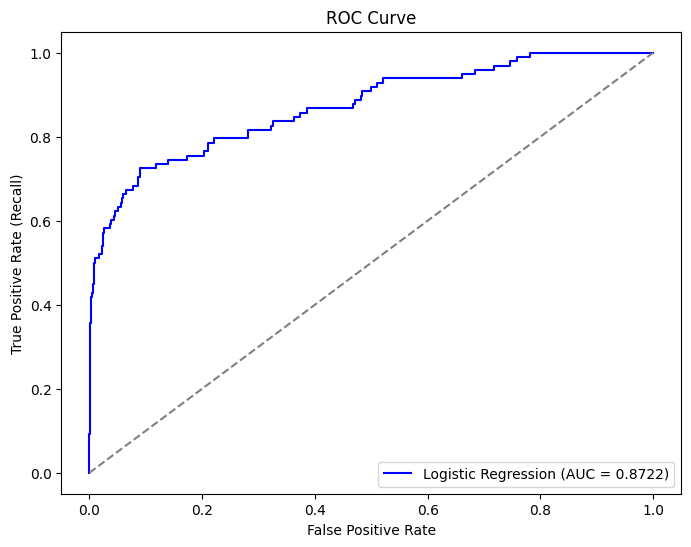

AUC: 0.8722


In [ ]:
y_proba = logreg.predict_proba(X_test_scaled)[:, 1]
# Calculate ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, y_proba)
roc_auc = auc(fpr, tpr)

# Plot the ROC Curve
plt.figure(figsize=(6, 4))
plt.plot(fpr, tpr, color='blue', label=f'Logistic Regression (AUC = {roc_auc:.4f})')
plt.plot([0, 1], [0, 1], color='grey', linestyle='--')  # Diagonal line for reference
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate (Recall)')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()

print(f"AUC: {roc_auc:.4f}")

The Logistic Regression model's high discriminative capacity between the positive and negative classes is demonstrated by its AUC score of 0.8722.
In practical terms, an AUC score of 0.8722 means that there’s an 87.22% chance that the model will correctly rank a randomly chosen positive instance higher than a randomly chosen negative instance.

The model has an 87.22% chance of properly ranking a randomly selected positive instance higher than a randomly selected negative instance, according to an AUC score of 0.8722.


#### KNN Model

In [62]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
knn_pred = knn.predict(X_test)

#### SVM Model

In [63]:
svm = SVC(kernel='linear')  # You can try other kernels as well
svm.fit(X_train, y_train)
svm_pred = svm.predict(X_test)

#### Calculate and compare accuracy scores

In [68]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

knn_acc = accuracy_score(y_test, knn_pred)
svm_acc = accuracy_score(y_test, svm_pred)


print("\nKNN Report:\n", classification_report(y_test, knn_pred,zero_division=0))
print("\nSVM Report:\n", classification_report(y_test, svm_pred,zero_division=0))


KNN Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.76      0.32      0.45        98

    accuracy                           1.00     56962
   macro avg       0.88      0.66      0.72     56962
weighted avg       1.00      1.00      1.00     56962


SVM Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.00      0.00      0.00        98

    accuracy                           1.00     56962
   macro avg       0.50      0.50      0.50     56962
weighted avg       1.00      1.00      1.00     56962



#### Comparison

**KNN : Best Model**: Because KNN finds a better balance between precision and recall for the minority class, it performs better than both SVM and Logistic Regression in identifying class 1.

**Logistic Regression**: Performs as a good baseline because it has high precision for class 1 but low recall.

**SVM** is the least successful since it is unable to detect occurrences of minority classes.
